In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datatools.SOWFA.constant.forcingTable import ForcingTable

In [3]:
prefix = '/scratch/equon/precursors/idealized/convective/run5/constant/'

In [4]:
# test general IO
from datatools.openfoam_util import read_all_defs
setup = read_all_defs(prefix+'../setUp',verbose=True)

/*--------------------------------*- C++ -*----------------------------------*\
| =========                 |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  2.4.x                                 |
|   \\  /    A nd           | Web:      www.OpenFOAM.org                      |
|    \\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
// Domain size and number of cells.
read xMin 0.0
read yMin 0.0
read zMin 0.0
read xMax 4320.0
read yMax 4320.0
read zMax 3000.0
read nx 108.0
read ny 108.0
read nz 75.0
// Number of cores and domain decomposition information.
read nCores 120.0
read decompType scotch
read decompOrder [1. 1. 1.]
// Planar averaging and source term statistics options.
read statisticsOn true
read statisticsFrequency 5.0
// Initial values for the variables.

## Read an existing forcingTable

In [5]:
tab = ForcingTable()
tab.read_openfoam_ascii(prefix+'momentumForcingTable',
                        prefix+'temperatureForcingTable')

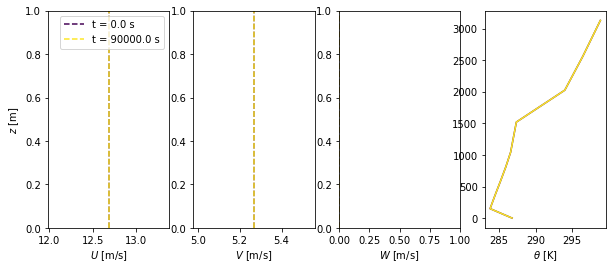

In [6]:
tab.plot_over_time()

## Reading a forcing table generated by WRF.viz

In [8]:
tab = ForcingTable()

In [9]:
tab.read_csv('forcingTable.csv')

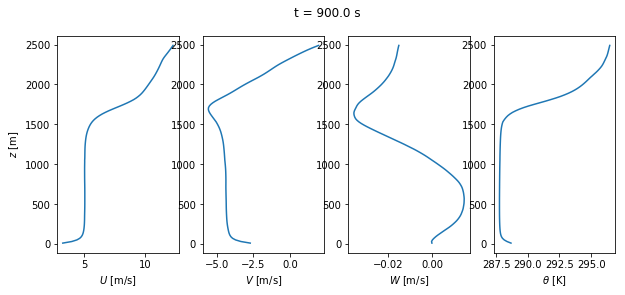

In [10]:
tab.plot(itime=1)

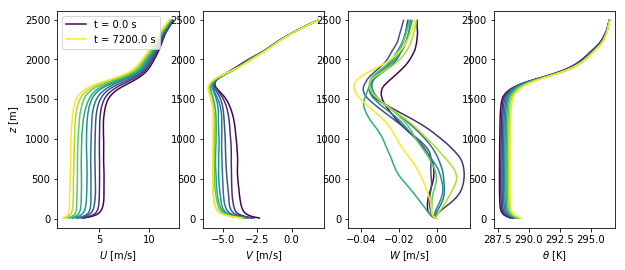

In [11]:
tab.plot_over_time()